In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/House_price.csv')
df.shape

(1459, 80)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

<Axes: >

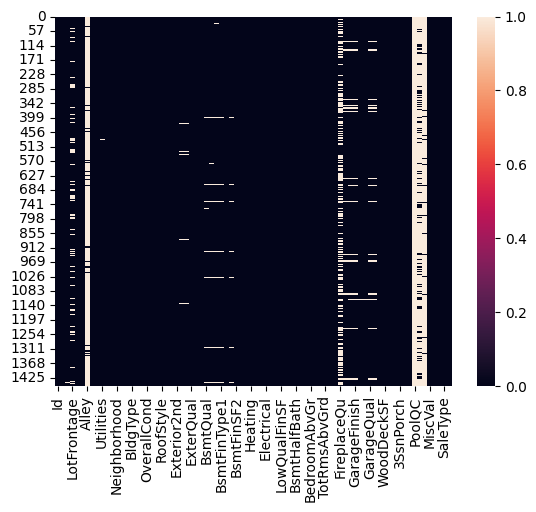

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [ ]:
df.shape[0]

1459

In [ ]:
df.isnull().sum()/df.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.068540
SaleCondition     0.000000
Length: 80, dtype: float64

In [ ]:
for var in df.columns:
  if (df[var].isnull().sum()/df.shape[0]*100>20):
    print(var)

Alley
FireplaceQu
PoolQC
Fence
MiscFeature


In [ ]:
drop_column=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
drop_column

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [ ]:
df_drop=df.drop(columns=drop_column)
df_drop.shape

(1459, 75)

In [ ]:
df_num=df_drop.select_dtypes(include=['int64','float64'])
df_num.keys()

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
for var in df_num.columns:
  if df_num[var].isnull().sum()>0:
    print(var)

LotFrontage
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
GarageYrBlt
GarageCars
GarageArea


In [ ]:
missing_var=[var for var in df_num.columns if df_num[var].isnull().sum()>0]
missing_var

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [ ]:
df_num_mean=df_drop.fillna(df_num.mean())

In [ ]:
list(enumerate(missing_var))

[(0, 'LotFrontage'),
 (1, 'MasVnrArea'),
 (2, 'BsmtFinSF1'),
 (3, 'BsmtFinSF2'),
 (4, 'BsmtUnfSF'),
 (5, 'TotalBsmtSF'),
 (6, 'BsmtFullBath'),
 (7, 'BsmtHalfBath'),
 (8, 'GarageYrBlt'),
 (9, 'GarageCars'),
 (10, 'GarageArea')]

In [ ]:
df_num_median=df_drop.fillna(df_num.median())

<ipython-input-43-5382977d5e90>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[item],bins=20,label='df_num')
<ipython-input-43-5382977d5e90>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num_mean[item],bins=20,label='df_num_mean')
<ipython-input-43-5382977d5e90>:6: UserWarning: 



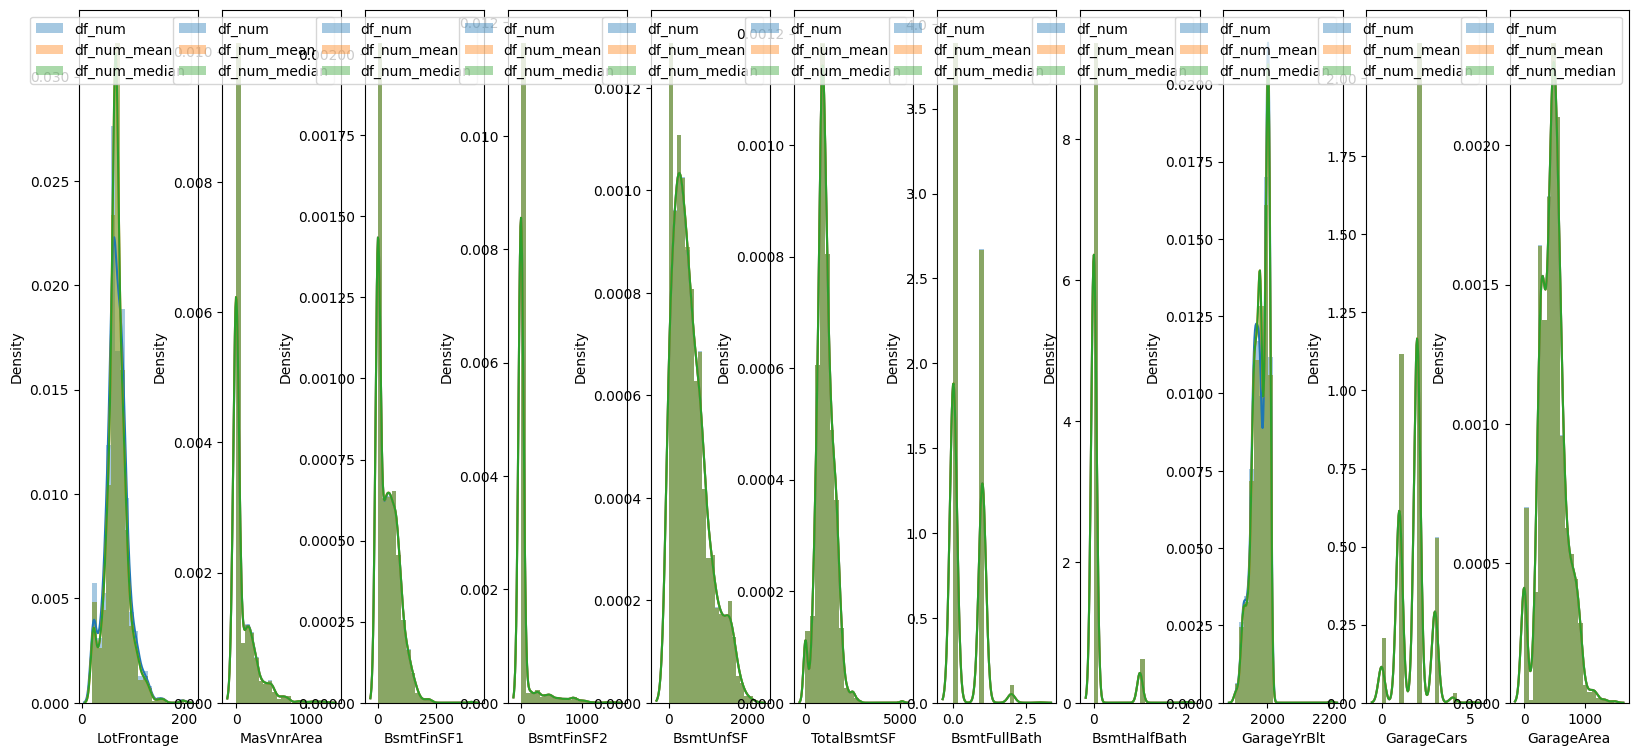

In [ ]:
plt.figure(figsize=(20,9))
for index,item in enumerate(missing_var):
  plt.subplot(1,11,index+1)
  sns.distplot(df_num[item],bins=20,label='df_num')
  sns.distplot(df_num_mean[item],bins=20,label='df_num_mean')
  sns.distplot(df_num_median[item],bins=20,label='df_num_median')
  plt.legend()

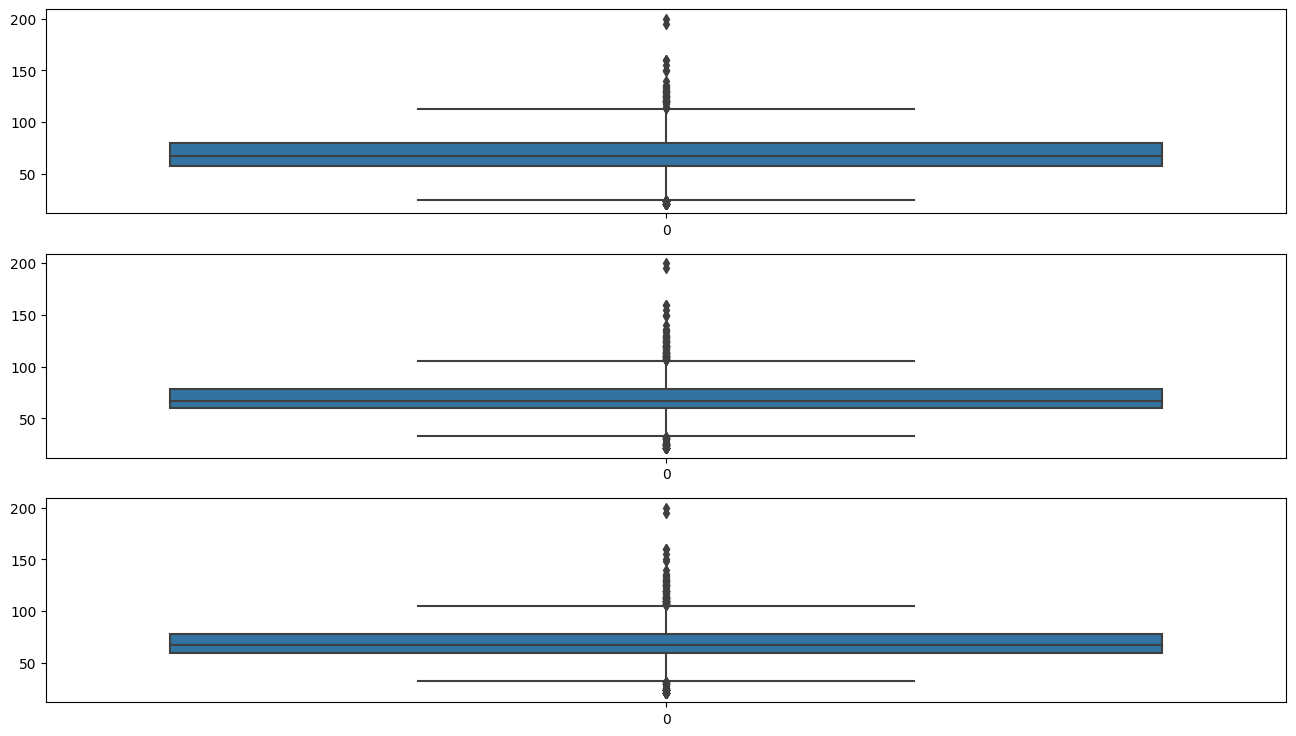

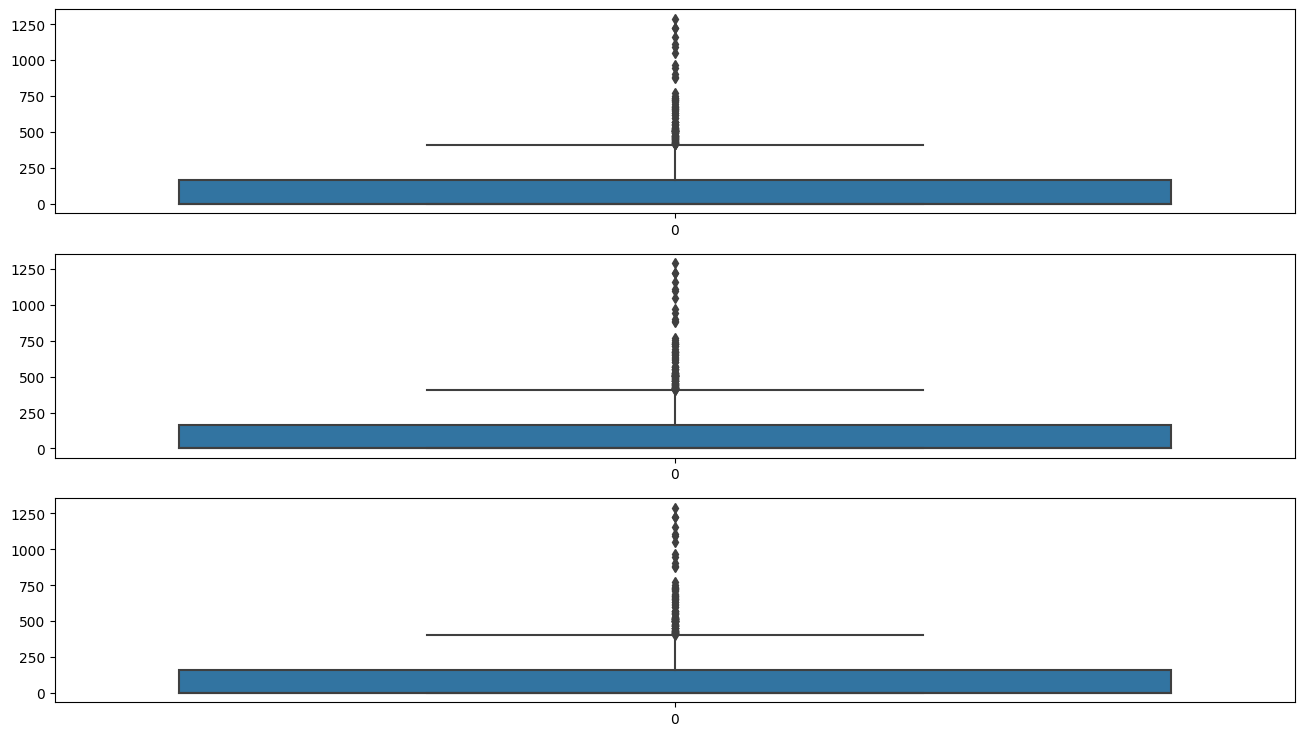

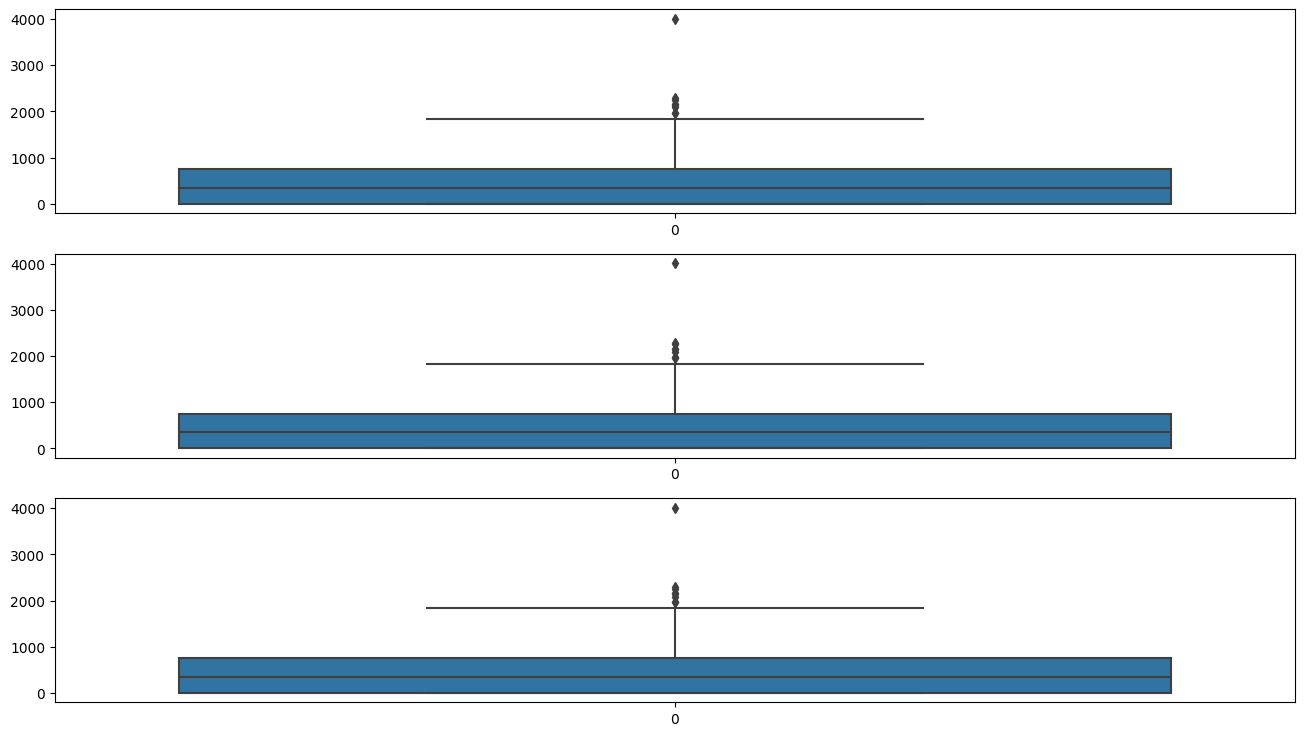

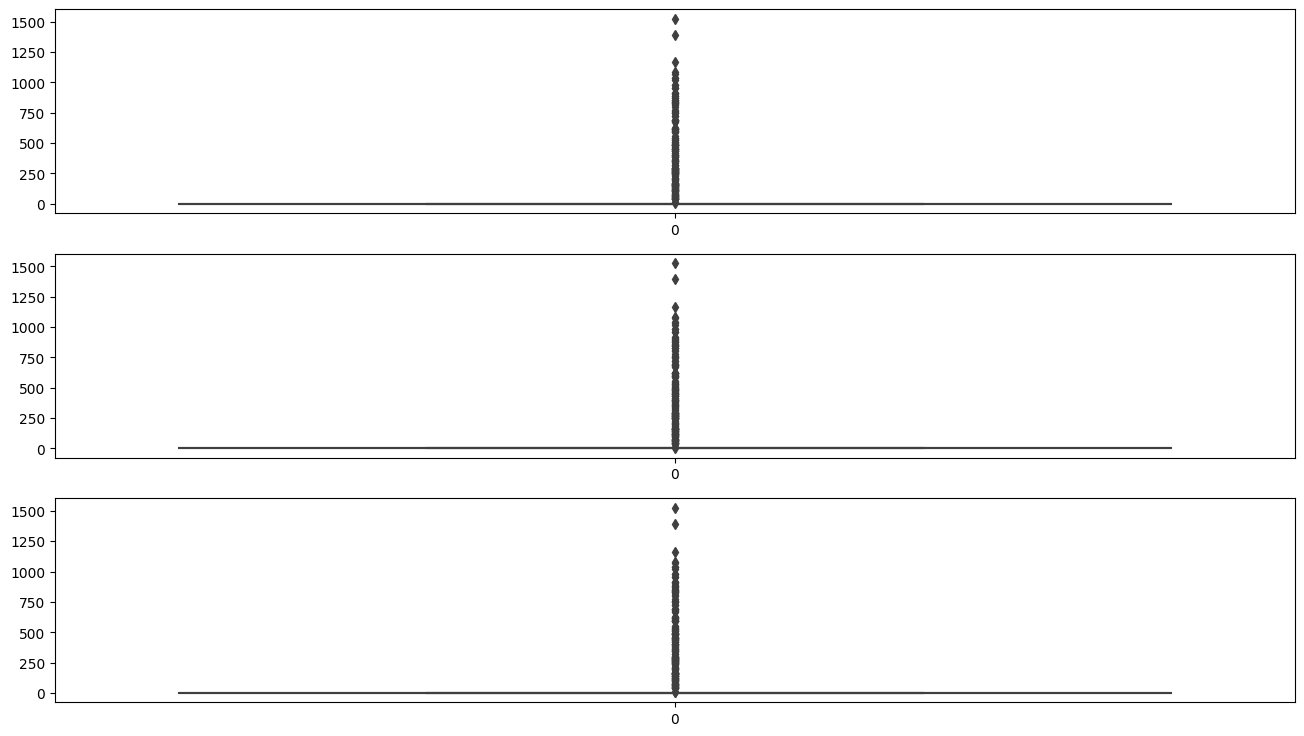

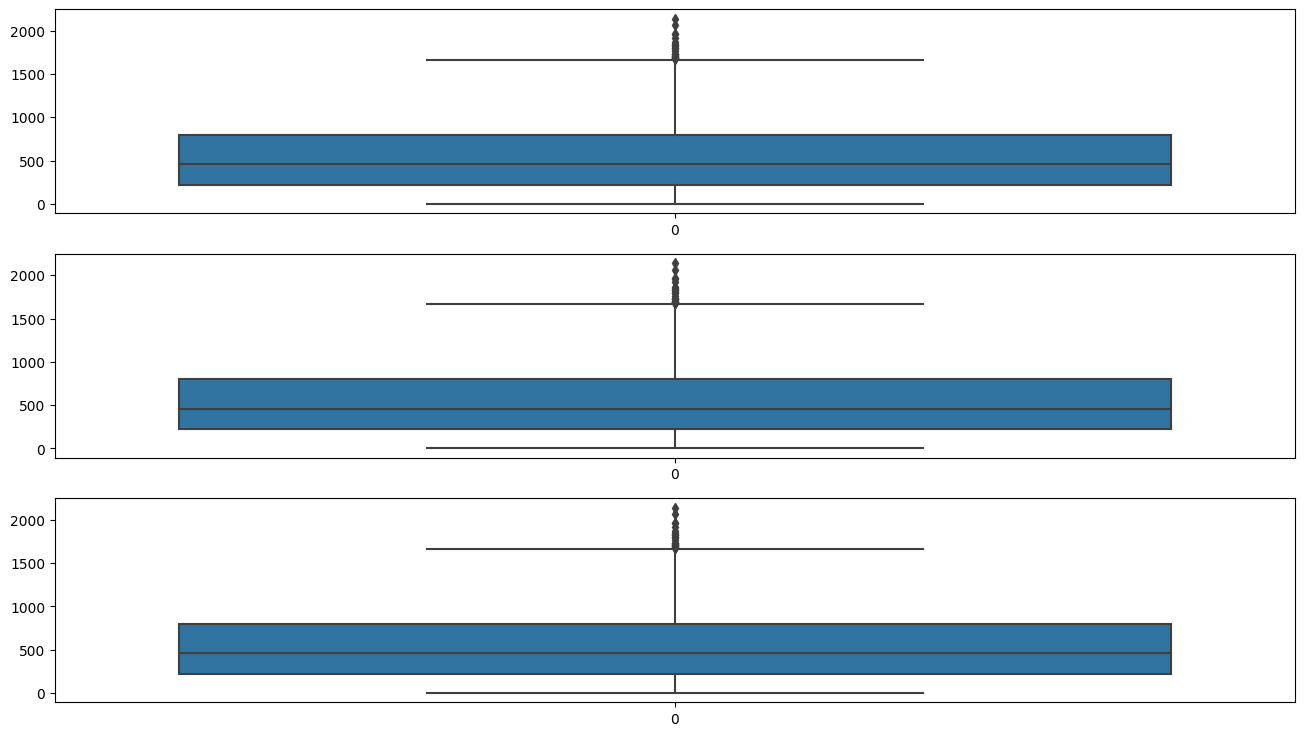

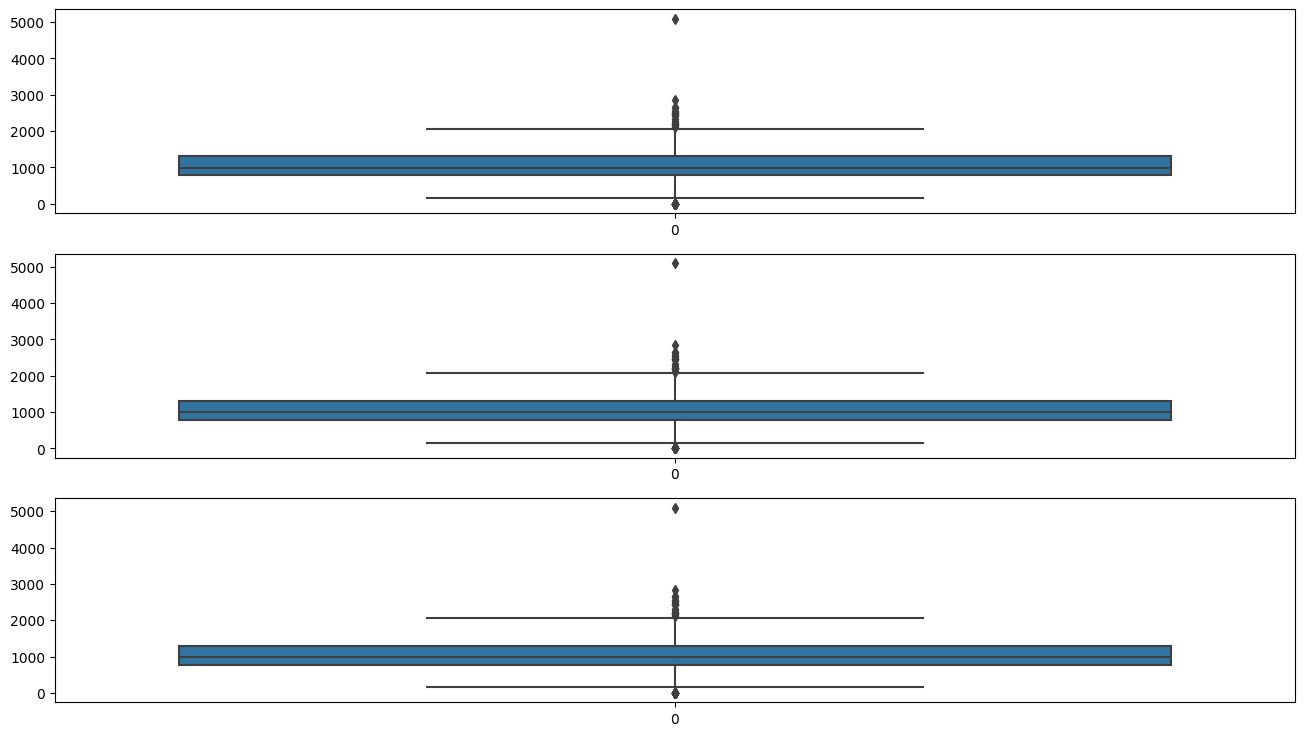

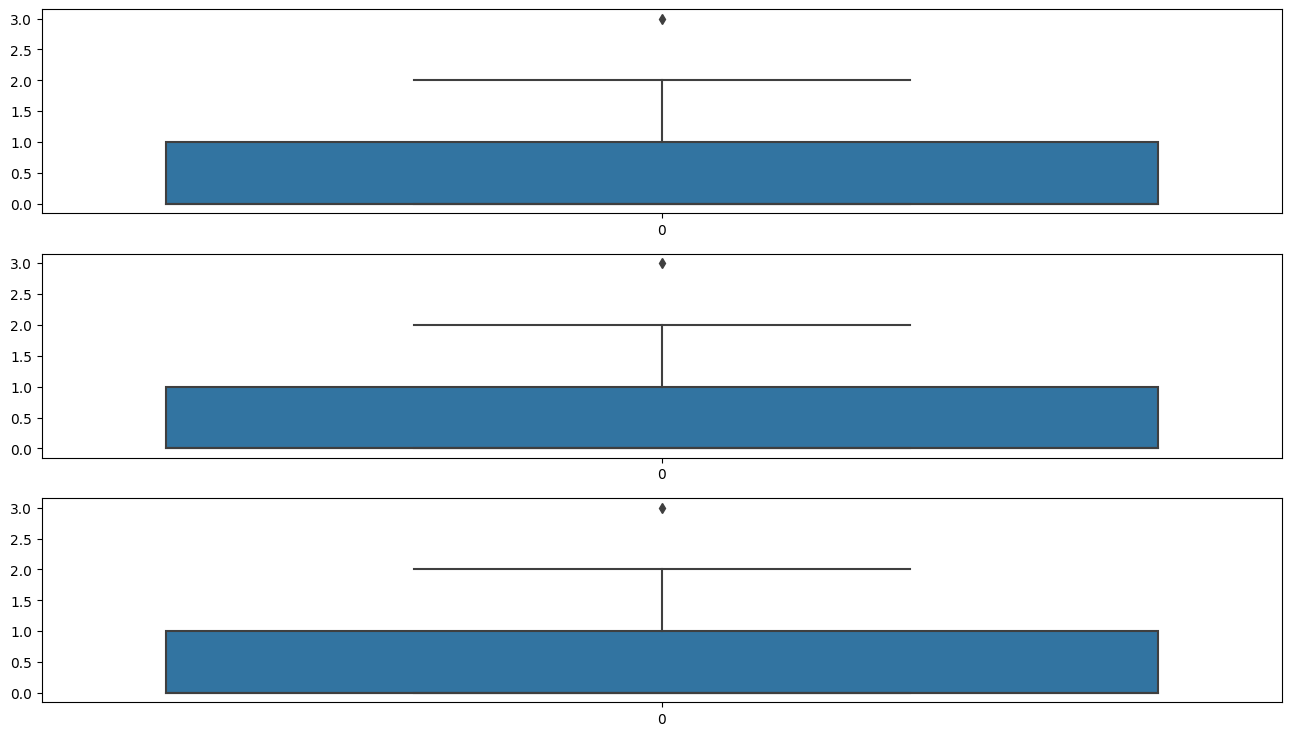

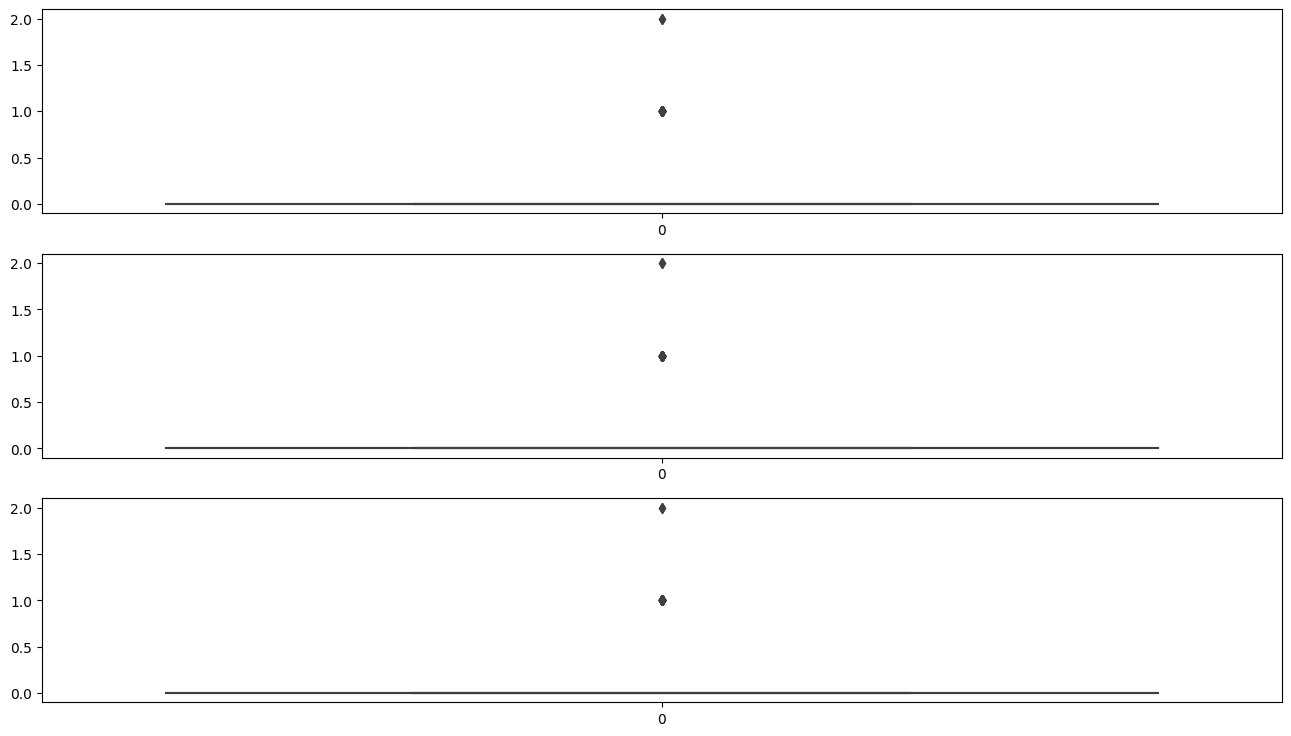

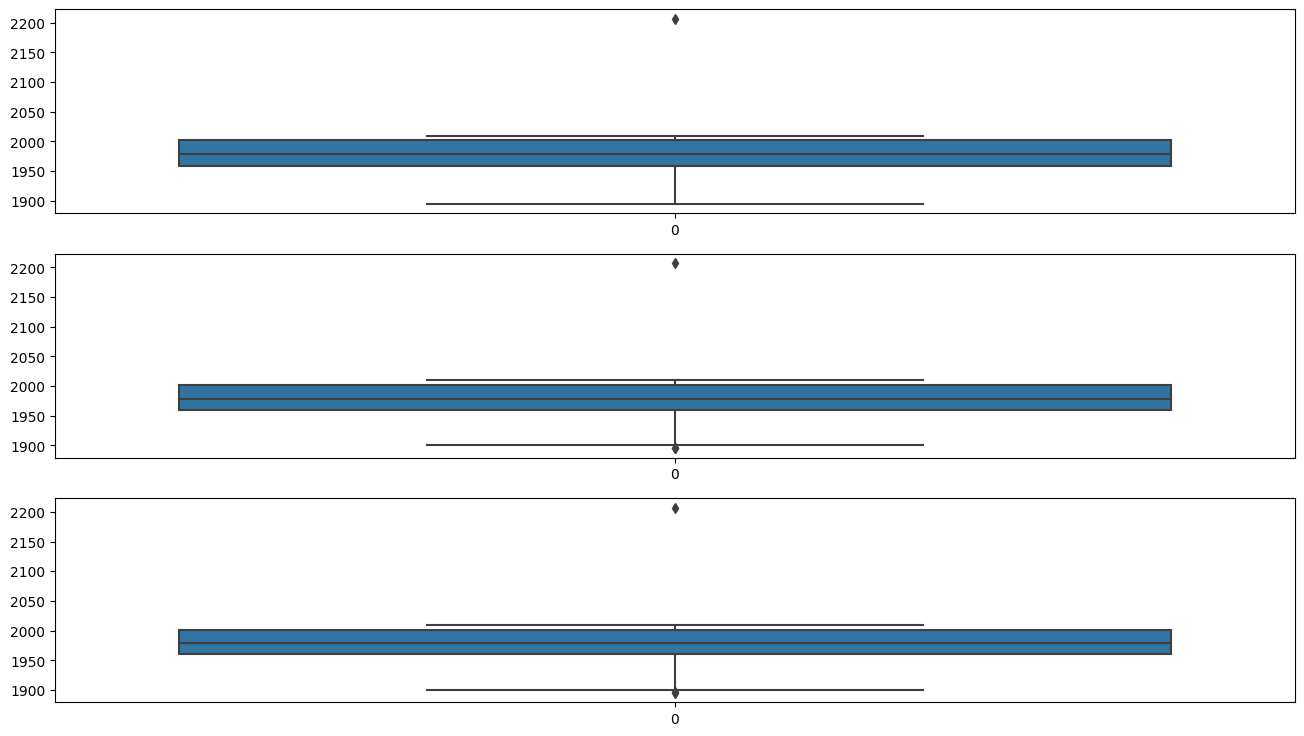

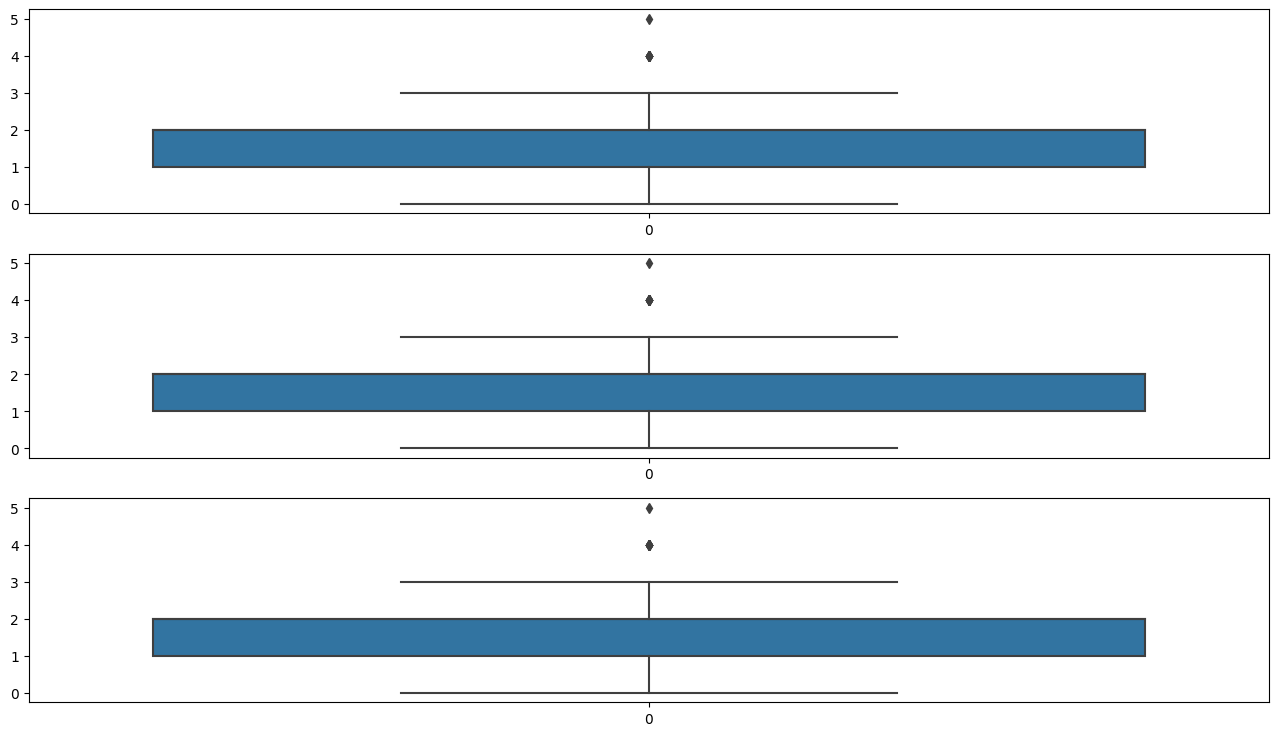

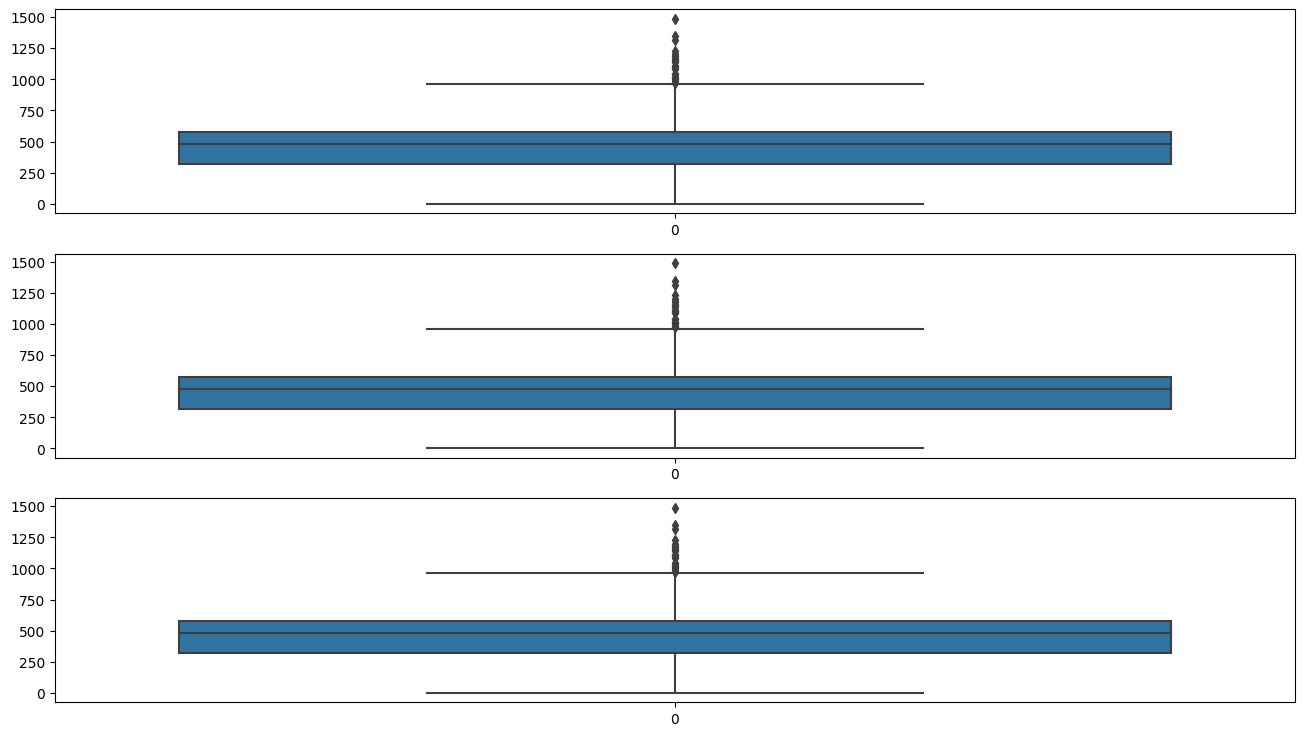

In [ ]:
for index,item in enumerate(missing_var):
  plt.figure(figsize=(16,9))
  plt.subplot(3,1,1)
  sns.boxplot(df_num[item])
  plt.subplot(3,1,2)
  sns.boxplot(df_num_mean[item])
  plt.subplot(3,1,3)
  sns.boxplot(df_num_median[item])